## Changing up the connectivity

In [127]:
from brian2 import *
%matplotlib inline

In [128]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

### Default

- 2 groups
- Across group inhibitory = 80% chance, both ways
- Rest ~20% across groups all excitatory, all within-group excitatory


In [129]:
start_scope()

inh = 0.001
exc = 0.001
n = 100

seed(21)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')

group1init = randint(0, 9, size=n)/10
group2init = randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

In [130]:
p = 0.6

I12 = choice(2, (n, n), p=[1-p, p])
sI1, tI1 = I12.nonzero()
I21 = choice(2, (n, n), p=[1-p, p])
sI2, tI2 = I21.nonzero()

E12 = 1 - I12
sE1, tE1 = E12.nonzero()
E21 = 1 - I21
sE2, tE2 = E21.nonzero()

In [131]:
# Inhibitory synapses
I1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
E2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# Self-excitatory synapses
S1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
S2 = Synapses(G2, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

I1.connect(i=sI1, j=tI1)
I2.connect(i=sI2, j=tI2)

E1.connect(i=sE1, j=tE1)
E2.connect(i=sE2, j=tE2)

S1.connect(condition='i != j')
S2.connect(condition='i != j')

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

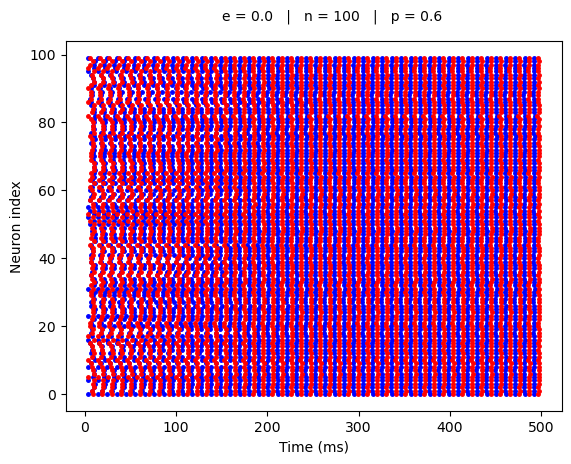

In [132]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

## 3 groups

All connected 3-partite

In [235]:
start_scope()

inh = 0.001
exc = 0.001
n = 30

seed(21)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
G3 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')

group1init = randint(0, 9, size=n)/10
group2init = randint(0, 9, size=n)/10
group3init = randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init
G3.v = group2init

In [236]:
p = 0.8

I12 = choice(2, (n, n), p=[1-p, p])
sI12, tI12 = I12.nonzero()
I13 = choice(2, (n, n), p=[1-p, p])
sI13, tI13 = I13.nonzero()

I21 = choice(2, (n, n), p=[1-p, p])
sI21, tI21 = I21.nonzero()
I23 = choice(2, (n, n), p=[1-p, p])
sI23, tI23 = I23.nonzero()

I31 = choice(2, (n, n), p=[1-p, p])
sI31, tI31 = I31.nonzero()
I32 = choice(2, (n, n), p=[1-p, p])
sI32, tI32 = I32.nonzero()


E12 = 1 - I12
sE12, tE12 = E12.nonzero()
E13 = 1 - I13
sE13, tE13 = E13.nonzero()
E21 = 1 - I21
sE21, tE21 = E21.nonzero()
E23 = 1 - I23
sE23, tE23 = E23.nonzero()
E31 = 1 - I31
sE31, tE31 = E31.nonzero()
E32 = 1 - I32
sE32, tE32 = E32.nonzero()

In [237]:
# Inhibitory synapses
I1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I3 = Synapses(G1, G3, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I4 = Synapses(G2, G3, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I5 = Synapses(G3, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I6 = Synapses(G3, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
E2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
E3 = Synapses(G1, G3, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + inh)/curr)))/tp))')
E4 = Synapses(G2, G3, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + inh)/curr)))/tp))')
E5 = Synapses(G3, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + inh)/curr)))/tp))')
E6 = Synapses(G3, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + inh)/curr)))/tp))')

# Self-excitatory synapses
S1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
S2 = Synapses(G2, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
S3 = Synapses(G3, G3, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + inh)/curr)))/tp))')
# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

I1.connect(i=sI12, j=tI12)
I2.connect(i=sI21, j=tI21)
I3.connect(i=sI13, j=tI13)
I4.connect(i=sI23, j=tI23)
I5.connect(i=sI31, j=tI31)
I6.connect(i=sI32, j=tI32)

E1.connect(i=sE12, j=tE12)
E2.connect(i=sE21, j=tE21)
E3.connect(i=sE13, j=tE13)
E4.connect(i=sE23, j=tE23)
E5.connect(i=sE31, j=tE31)
E6.connect(i=sE32, j=tE32)

S1.connect(condition='i != j')
S2.connect(condition='i != j')
S3.connect(condition='i != j')

In [238]:
M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
M3 = StateMonitor(G3, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)
Sp3 = SpikeMonitor(G3)

run(600*ms)

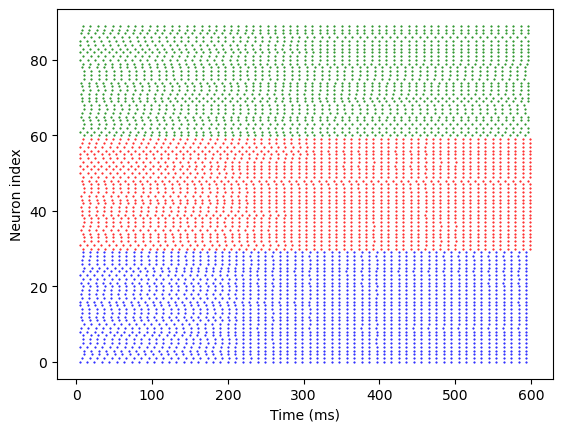

In [239]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=1)
plot(Sp2.t/ms, Sp2.i + n, '.r', markersize=1)
plot(Sp3.t/ms, Sp3.i + 2*n, '.g', markersize=1)
xlabel('Time (ms)')
ylabel('Neuron index')
# text(50, 50, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

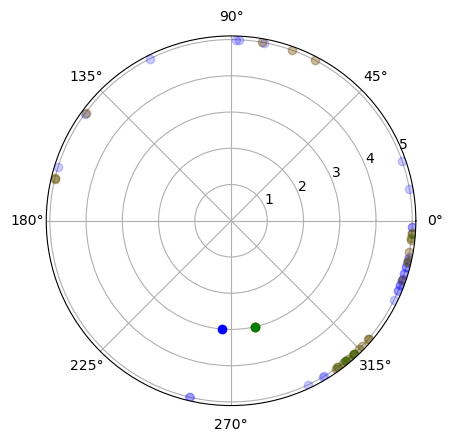

In [240]:
polared = lambda t, M : (M.v[:,t] * 2*pi, mean(M.v[:,t] * 2*pi))
dummy = ones(n)*5
alph = 0.2

timer = 450

pld1 = polared(timer, M1)

pld2 = polared(timer, M2)

pld3 = polared(timer, M2)


M1_avg = pld1[1]
M2_avg = pld2[1]
M3_avg = pld3[1]

polar(pld1[0], dummy, 'bo', alpha = alph)
polar(pld2[0], dummy, 'ro', alpha = alph)
polar(pld3[0], dummy, 'go', alpha = alph)

polar(M1_avg, 3, 'bo')
polar(M2_avg, 3, 'ro')
polar(M3_avg, 3, 'go');

Text(0.5, 0, 'Simulation time')

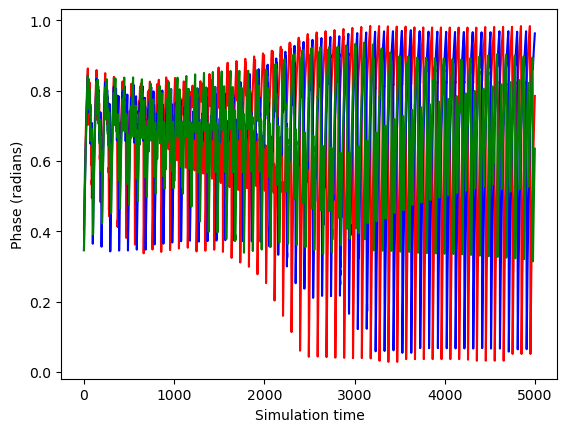

In [241]:
times = range(0, 5000, 1)
M1_avgs = []
M2_avgs = []
M3_avgs = []

for t in times:
        pd1 = polared(t, M1)
        pd2 = polared(t, M2)
        pd3 = polared(t, M3)
        M1_avgs.append(pd1[1]/(2*pi))
        M2_avgs.append(pd2[1]/(2*pi))
        M3_avgs.append(pd3[1]/(2*pi))

plot(times, M1_avgs, color='red')
plot(times, M2_avgs, color='blue')
plot(times, M3_avgs, color='green')
ylabel("Phase (radians)")
xlabel("Simulation time * 10")
# plot(times, subtract(M1_avgs, M2_avgs), color='green');